In [1]:
import pandas as pd
import string
from pypinyin import lazy_pinyin

In [2]:
# Read character frequency from CSV file
# Assume the CSV has columns: 'character', 'frequency'
df = pd.read_csv('./Resources/CNfreq2.5B.csv')

# Find pinyin code for each character
df['pinyin'] = df['character'].apply(lambda x: ' '.join(lazy_pinyin(str(x))))

# Display the DataFrame
df.head(100)

,serial number,character,token,frequency(per million),total coverage rate(%),pinyin
0,1.0,的,76938354,40529.65053,4.05297,de
1,2.0,一,35278860,18584.22740,5.91139,yi
2,3.0,了,34812434,18338.52313,7.74524,le
3,4.0,是,31422712,16552.88253,9.40053,shi
4,5.0,不,29858097,15728.67333,10.97340,bu
...,...,...,...,...,...,...
95,96.0,眼,3495315,1841.26496,46.65406,yan
96,97.0,成,3478315,1832.30969,46.83730,cheng
97,98.0,方,3471764,1828.85875,47.02018,fang
98,99.0,年,3465446,1825.53054,47.20273,nian


In [3]:
# Initialize result dictionary
total_freq_by_letter = {}

for letter in string.ascii_lowercase:
    mask = df['pinyin'].str.contains(letter, case=False, na=False)
    total_freq_by_letter[letter] = df.loc[mask, 'frequency(per million)'].sum()

# Convert to pandas Series for easier viewing
total_freq_by_letter = pd.Series(total_freq_by_letter)
# Sort the total_freq_by_letter Series by frequency in descending order
sorted_freq = total_freq_by_letter.sort_values(ascending=False)
sorted_freq

i    400238.96828
n    325350.72433
a    313129.26217
e    240482.37459
u    221539.31142
h    210081.32153
g    175409.01089
o    171102.03925
d    107185.79053
z     96106.30912
s     94899.42984
y     89520.82320
l     63563.53184
j     59906.08732
x     51591.49767
b     46809.31217
w     40712.58894
t     38884.01147
m     38799.86294
c     34219.67511
q     32136.63854
r     30501.15138
f     21425.31025
k     20494.29314
p      9697.54180
v      2751.53484
dtype: float64

In [4]:
qwert_freq_colemak = pd.read_csv("./qwerty_freq_map_colemak.csv", index_col=0)
letters_by_freq = sorted_freq.index.tolist()
# Get the list of QWERTY keys in order from colemak styles
qwerty_keys = qwert_freq_colemak['QWERTY Key'].tolist()

# Create the mapping dictionary
freq_to_qwerty_key = dict(zip(qwerty_keys, letters_by_freq))
freq_to_qwerty_key

{'k': 'i',
 'f': 'n',
 'a': 'a',
 ';': 'e',
 'l': 'u',
 'j': 'h',
 'd': 'g',
 'h': 'o',
 's': 'd',
 'g': 'z',
 'u': 's',
 'c': 'y',
 'i': 'l',
 'm': 'j',
 'w': 'x',
 'e': 'b',
 't': 'w',
 'o': 't',
 'r': 'm',
 'b': 'c',
 'v': 'q',
 'n': 'r',
 'y': 'f',
 'x': 'k',
 'q': 'p',
 'z': 'v'}

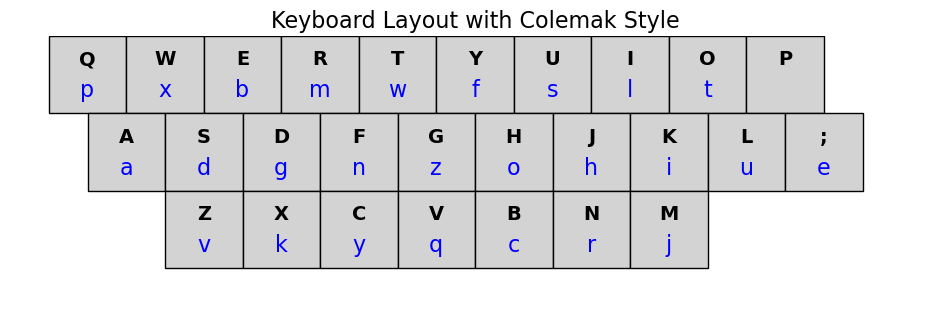

In [7]:
import matplotlib.pyplot as plt

# Define a standard QWERTY keyboard layout (3 rows) with standard offsets
keyboard_rows = [
    ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p'],
    ['a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ';'],
    ['z', 'x', 'c', 'v', 'b', 'n', 'm']
]
# Standard QWERTY row horizontal offsets (in key units)
row_offsets = [0, 0.5, 1.5]

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')

for row_idx, row in enumerate(keyboard_rows):
    for col_idx, key in enumerate(row):
        x = col_idx + row_offsets[row_idx]
        y = 2 - row_idx
        rect = plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        ax.text(x + 0.5, y + 0.7, key.upper(), ha='center', va='center', fontsize=14, fontweight='bold')
        mapped = freq_to_qwerty_key.get(key, '')
        if mapped:
            ax.text(x + 0.5, y + 0.3, mapped, ha='center', va='center', fontsize=16, color='blue')

ax.set_xlim(-0.5, 11.5)
ax.set_ylim(-0.5, 3)
ax.set_aspect('equal')
plt.title('Keyboard Layout with Colemak Style', fontsize=16)
plt.show()
